# Master Thesis Notebook

In [12]:
import pandas as pd
import glob 
import numpy as np
import matplotlib.pyplot as plt
import os

field_a_paths = glob.glob("D:/Cours bioingé/BIR M2/Mémoire/Data/Drone GPR/Field A/*.txt") # return all file paths that match a specific pattern
field_b_paths = glob.glob("D:/Cours bioingé/BIR M2/Mémoire/Data/Drone GPR/Field B/*.txt")

gpr_data_tables = []
def import_data(file_paths=glob.glob("D:/Cours bioingé/BIR M2/Mémoire/Data/Drone GPR/Field A/*.txt")):
    for file_path in file_paths:
        gpr_data_table = pd.read_csv(file_path, sep = "  ", engine="python")
        gpr_data_tables.append(gpr_data_table)

    return gpr_data_tables

dates = []
def extract_dates(file_paths=glob.glob("D:/Cours bioingé/BIR M2/Mémoire/Data/Drone GPR/Field A/*.txt")):
    for file_path in file_paths:
        file_name = os.path.basename(file_path)
        file_name_without_extension = os.path.splitext(file_name)[0]
        
        date = file_name_without_extension[4:6] + "/" + file_name_without_extension[2:4] + "/" + "20" + file_name_without_extension[:2]
        dates.append(date)

    return dates




    

## GPR data analysis

### Volumetric water content evolution of field A

#### Mean and median plots

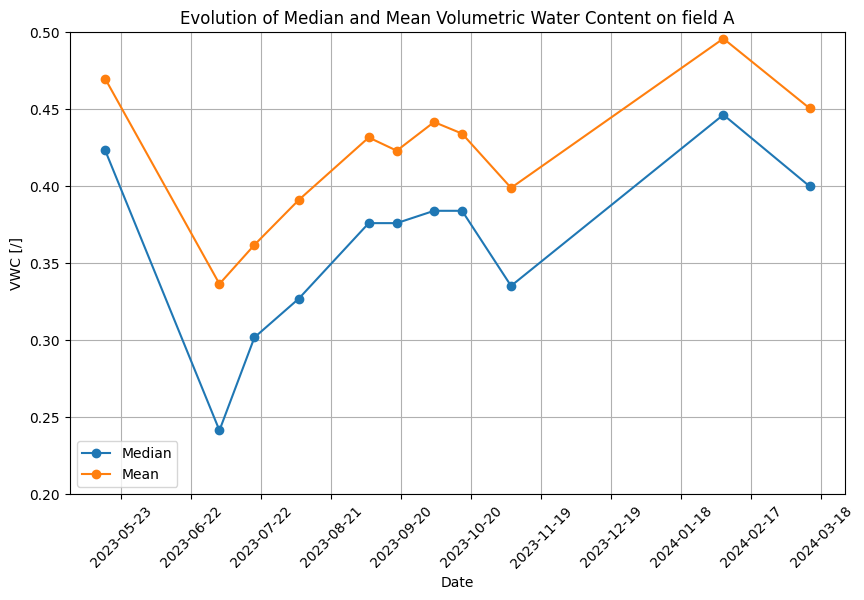

In [13]:
import_data(field_a_paths)

mean_GPR_data_tables = []
for gpr_data_table in gpr_data_tables:
    mean_GPR_data_table = gpr_data_table.iloc[:,2].mean()
    mean_GPR_data_tables.append(mean_GPR_data_table)

median_GPR_data_tables = []
for gpr_data_table in gpr_data_tables:
    median_GPR_data_table = gpr_data_table.iloc[:,2].median()
    median_GPR_data_tables.append(median_GPR_data_table)

dates = extract_dates(field_a_paths)

# Convert dates to datetime objects
dates = pd.to_datetime(dates, format="%d/%m/%Y")

plt.figure(figsize=(10, 6))
plt.plot(dates, median_GPR_data_tables, marker='o', label='Median')
plt.plot(dates, mean_GPR_data_tables, marker='o', label='Mean')
plt.xlabel('Date')
plt.ylabel('VWC [/]')
plt.title('Evolution of Median and Mean Volumetric Water Content on field A')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))
plt.ylim(0.2, 0.5)
plt.grid(True)
plt.legend()
plt.show()


# Reset
gpr_data_tables = []
dates = []

### Volumetric water content evolution of field B

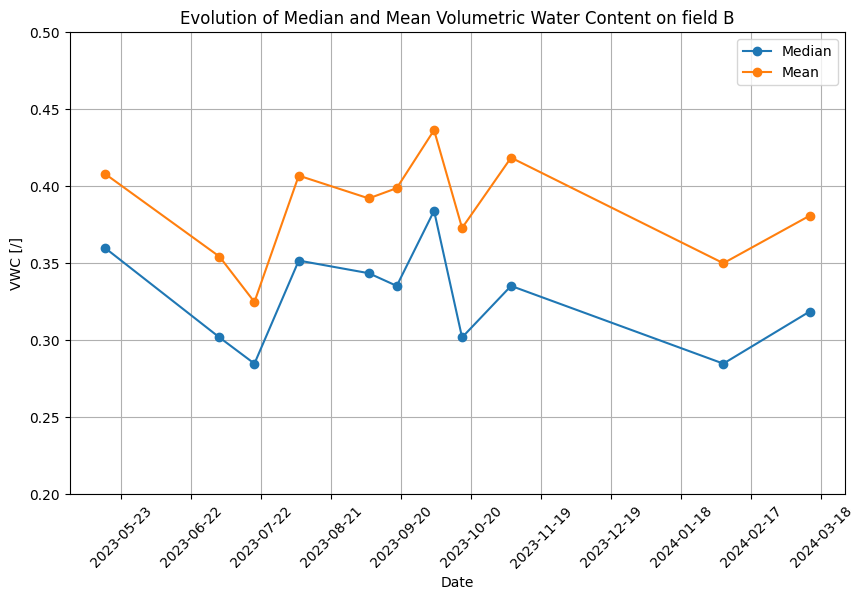

In [14]:
import_data(field_b_paths)

mean_GPR_data_tables = []
for gpr_data_table in gpr_data_tables:
    mean_GPR_data_table = gpr_data_table.iloc[:,2].mean()
    mean_GPR_data_tables.append(mean_GPR_data_table)

median_GPR_data_tables = []
for gpr_data_table in gpr_data_tables:
    median_GPR_data_table = gpr_data_table.iloc[:,2].median()
    median_GPR_data_tables.append(median_GPR_data_table)

dates = extract_dates(field_b_paths)

# Convert dates to datetime objects
dates = pd.to_datetime(dates, format="%d/%m/%Y")

plt.figure(figsize=(10, 6))
plt.plot(dates, median_GPR_data_tables, marker='o', label='Median')
plt.plot(dates, mean_GPR_data_tables, marker='o', label='Mean')
plt.xlabel('Date')
plt.ylabel('VWC [/]')
plt.title('Evolution of Median and Mean Volumetric Water Content on field B')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))
plt.ylim(0.2, 0.5)
plt.grid(True)
plt.legend()
plt.show()

# Reset
gpr_data_tables = []
dates = []

### Krigeage

## Multispectral analysis

### Volumetric water content evolution of field A

## Multispectral vs GPR

# Tests